# Use dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data.

## Contest:-

 The data contains features extracted from the silhouette of vehicles in different
angles. Four "Corgie" model vehicles were used for the experiment: a double
decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This
particular combination of vehicles was chosen with the expectation that the
bus, van and either one of the cars would be readily distinguishable, but it
would be more difficult to distinguish between the cars.
The purpose is to classify a given silhouette as one of three types of vehicle(car,bus,van),
using a set of features extracted from the silhouette. The vehicle may be viewed
from one of many different angles.

## Attribute Information:-

   - **compactness**	
   - **circularity**
   - **distance_circularity**	
   - **radius_ratio**	 
   - **pr.axis_aspect_ratio**	
   - **max.length_aspect_ratio**	
   - **scatter_ratio	elongatedness**	
   - **pr.axis_rectangularity	**
   - **max.length_rectangularity**	
   - **scaled_variance**	
   - **scaled_variance.1** 	
   - **scaled_radius_of_gyration**	
   - **scaled_radius_of_gyration.1**	
   - **skewness_about**	
   - **skewness_about.1**	
   - **skewness_about.2**	
   - **hollows_ratio**	
   - **class** - Bus , Car , Van 

## Import all neccessary modules and load the data

In [2]:


#Import all necessary modules and load the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import recall_score,precision_score,confusion_matrix,classification_report



In [3]:
df=pd.read_csv('vehicle-1.csv')

### Print top 10 rows from the dataset

In [4]:
df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

### Print bottom 10 rows of dataset

In [5]:
df.tail(10)

compactness  circularity  distance_circularity  radius_ratio  \
836           87         45.0                  66.0         139.0   
837           94         46.0                  77.0         169.0   
838           95         43.0                  76.0         142.0   
839           90         44.0                  72.0         157.0   
840           93         34.0                  66.0         140.0   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
836                  58.0                        8          140.0   
837                  60.0                        8          158.0   
838                  57.0                       10          151.0   
839                  64.0                        8          137.0   
840                  56.0                        7          130.0   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
836           47.0                    18.0                        148   
837           42.0                    20.0                        148   
838           44.0                    19.0                        149   
839           48.0                    18.0                        144   
840           51.0                    18.0                        120   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
836            168.0              294.0                      175.0   
837            181.0              373.0                      181.0   
838            173.0              339.0                      159.0   
839            159.0              283.0                      171.0   
840            151.0              251.0                      114.0   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
836                         73.0             3.0              12.0   
837                         67.0            12.0               2.0   
838                         71.0             2.0              23.0   
839                         65.0             9.0               4.0   
840                         62.0             5.0              29.0   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  hollows_ratio class  
836             188.0            196   van  
837             193.0            199   car  
838 

### Print the datatypes of each column and the shape of the dataset

In [6]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [7]:
df.shape

(846, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

   #####             Original dataset has 846 rows and 19 cloumns(attributes)

### To check whether dataset contains null values

In [9]:
print(df.isna().sum().sum())
print(df.isnull().sum().sum())

41
41


In [10]:
df=df.fillna(df.mean())

> Replacing Null values with mean values

In [11]:
print(df.isna().sum().sum())
print(df.isnull().sum().sum())

0
0


In [12]:
df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.828775    6.133943   33.0   40.00   
distance_circularity         846.0   82.110451   15.740902   40.0   70.00   
radius_ratio                 846.0  168.888095   33.400979  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.678910    7.882119   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.901775   33.195188  112.0  147.00   
elongatedness                846.0   40.933728    7.811559   26.0   33.00   
pr.axis_rectangularity       846.0   20.582444    2.588326   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.631079   31.355195  130.0  167.00   
scaled_variance.1            846.0  439.494076  176.457706  184.0  318.25   
scaled_radius_of_gyration    846.0  174.709716   32.546223  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.447743    7.468450   59.0   67.00   
skewness_about               846.0    6.364286    4.903148    0.0    2.00   
skewness_about.1             846.0   12.602367    8.930792    0.0    5.00   
skewness_about.2             846.0  188.919527    6.152166  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 168.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            364.0  586.75  1018.0  
scaled_radius_of_gyration    174.0  198.00   268.0  
scaled_radius_of_gyration.1   72.0   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

In [13]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

> There are 429 cars,218 bus and 199 van

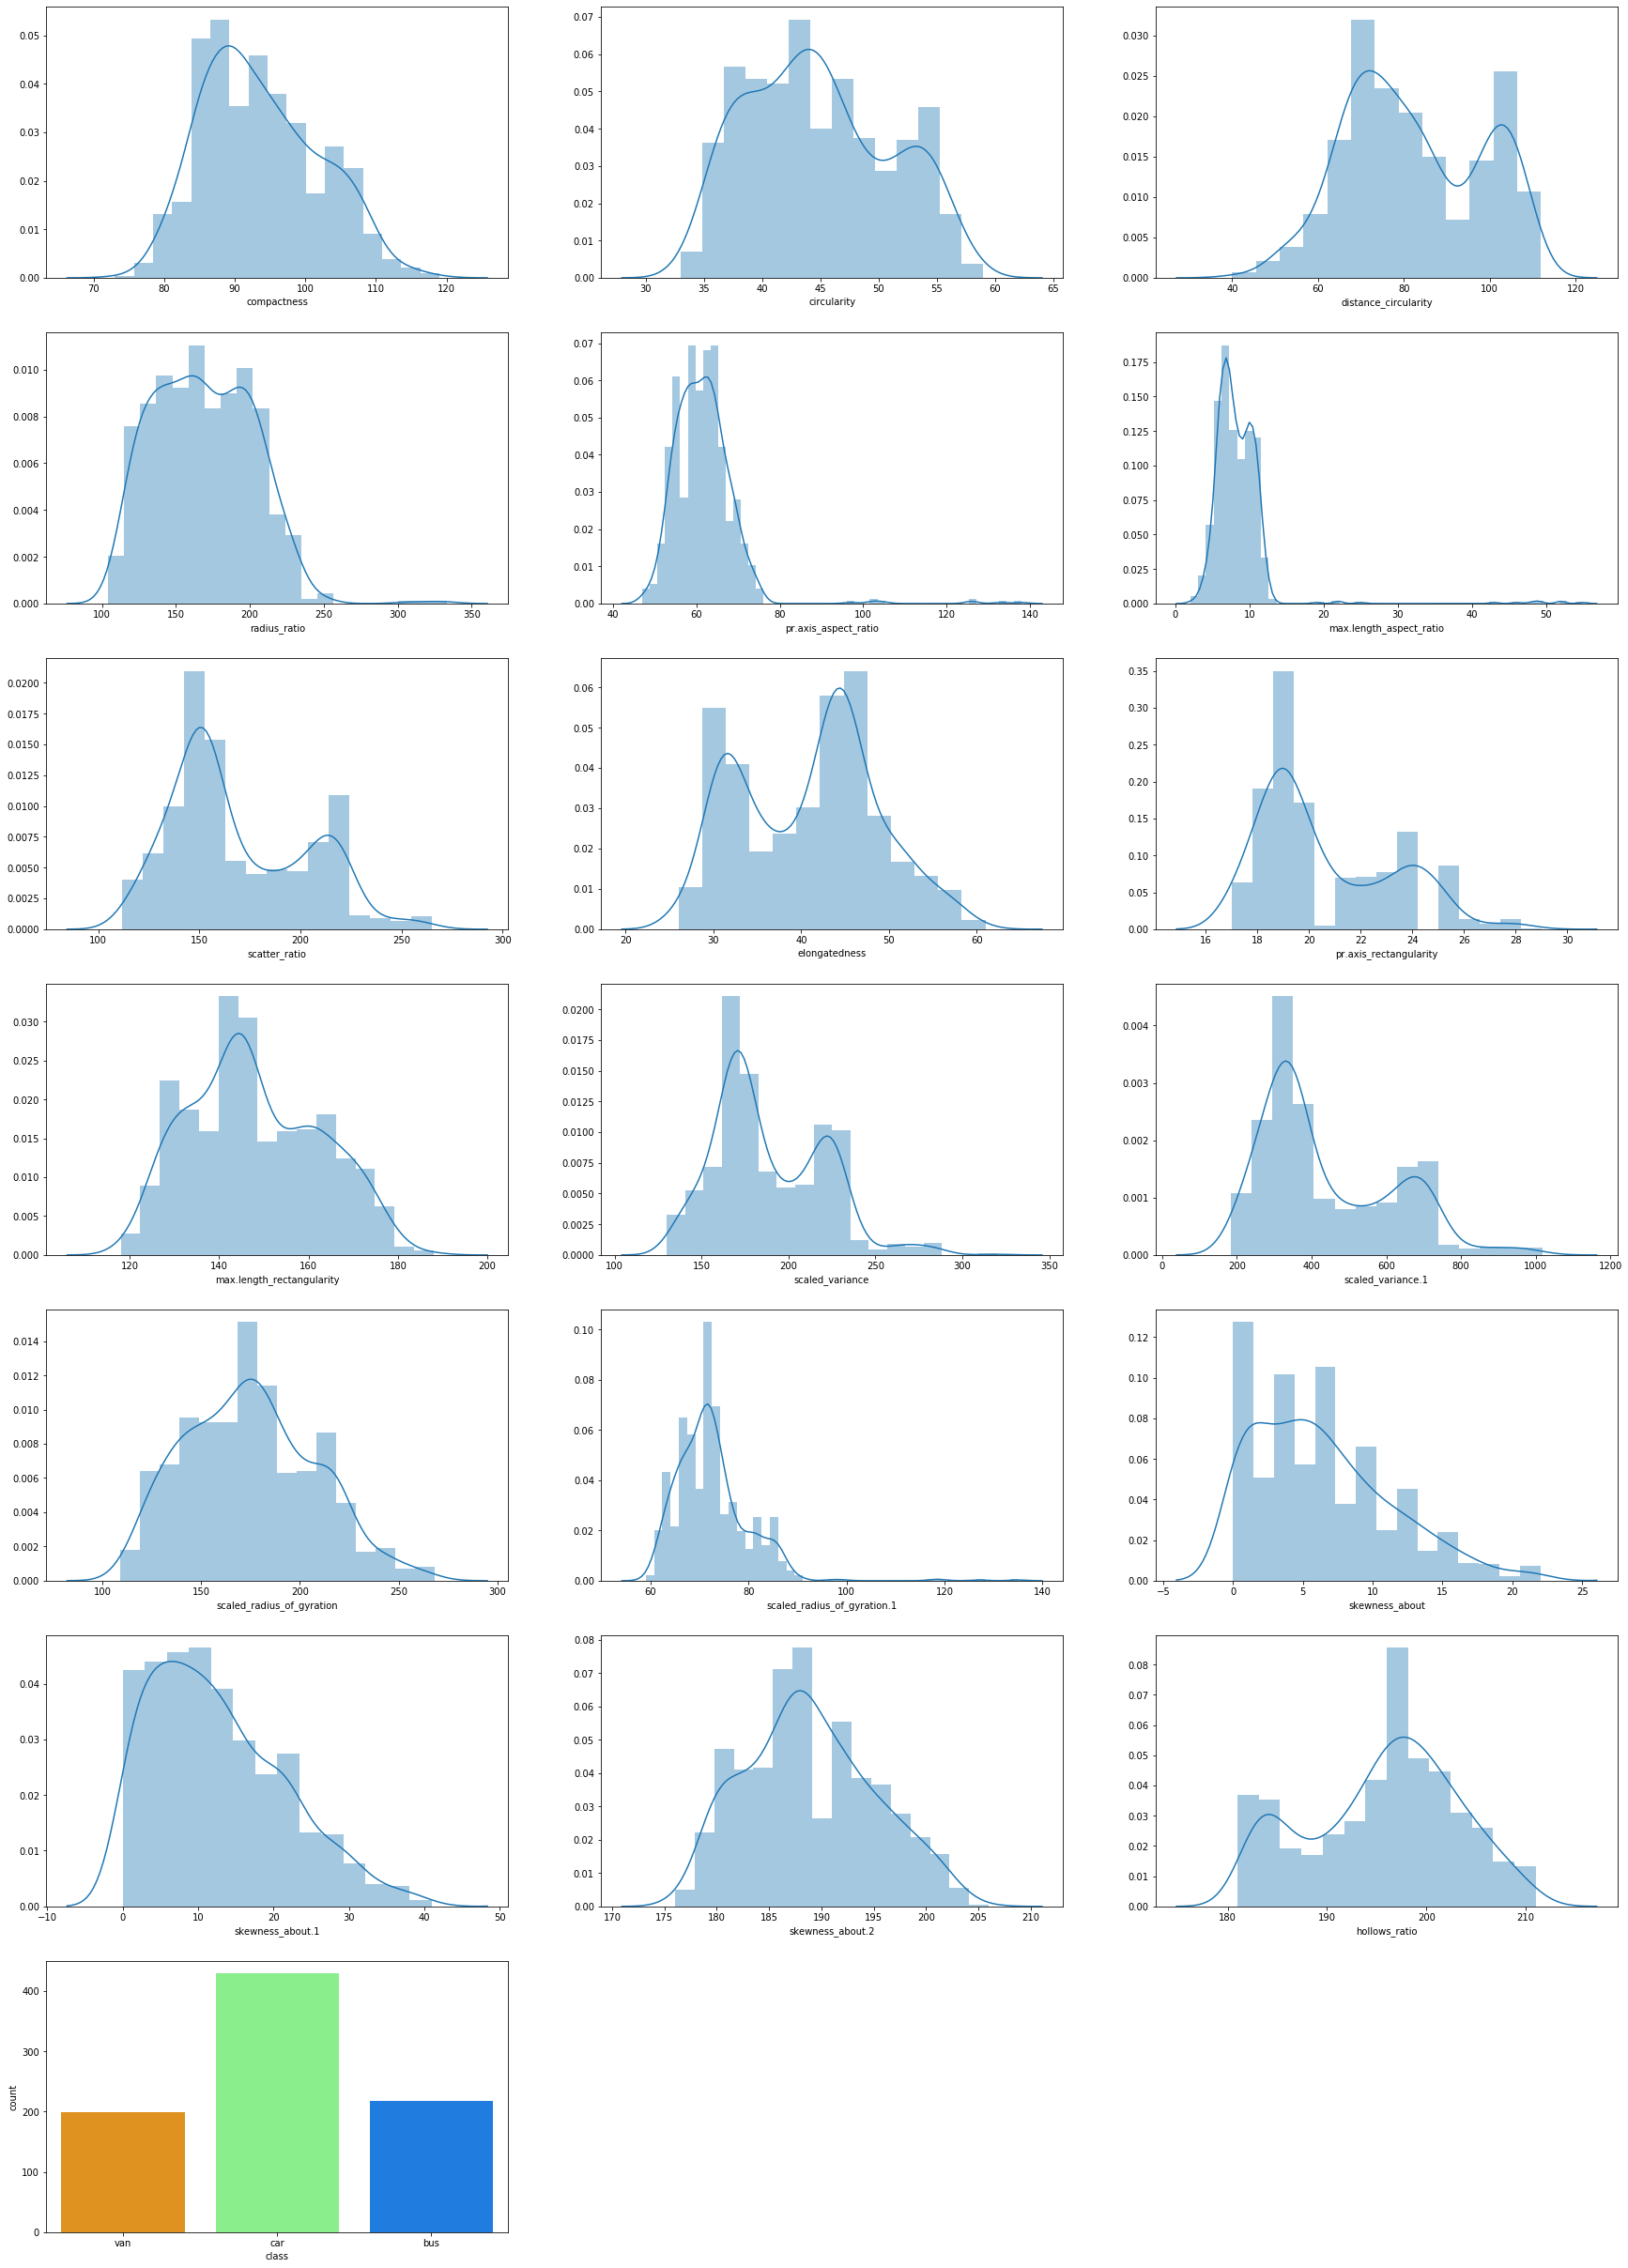

In [14]:
plt.figure(figsize= (30,50))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in df.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    plt.subplot(8, 3, pos)   # plot grid
    if feature not in ['class']:   # Plot histogram for all the continuous columns
         sns.distplot(df[feature], kde= True )   
    else:
        sns.countplot(df[feature], palette= 'jet_r')    # Plot bar chart for all the categorical columns
    pos += 1  # to plot over the grid one by one  

 - Compactness,pr.axis_rectangularity,scaled_radius_of_gyration.1,skewness_about.2,radius_ratio,pr.axis_aspect_ratio and  scaled_radius_of_gyration are seems to have normal distribution.
 - Skewness_about,skewness_about.1 tends to have left skewness.
 - Circularity,distance_circularity,max.length_aspect_ratio,pr.axis_aspect_ratio,skewness_about.2 and scaled_variance have high number of outliers.





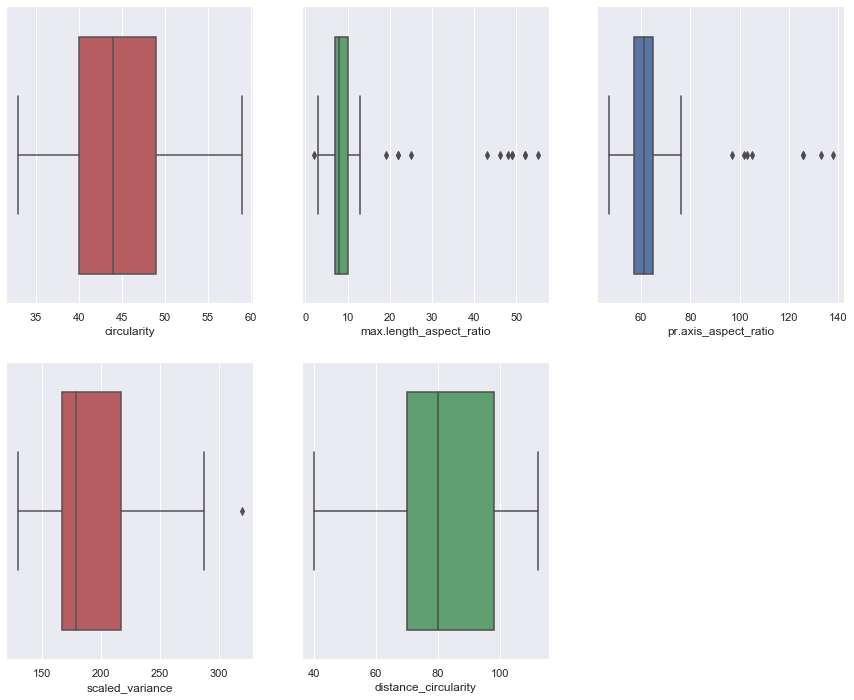

In [15]:
#Boxplot to view outliers of Circularity,distance_circularity,max.length_aspect_ratio,pr.axis_aspect_ratio,
#skewness_about.2 and scaled_variance.
sns.set(style="darkgrid")
#Set up the matplotlib figure
f, axes = plt.subplots(2,3, figsize=(15,12))
sns.despine(left=True)
sns.boxplot(df.circularity, color="r", ax=axes[0,0],)
sns.boxplot(df['max.length_aspect_ratio'], color="g", ax=axes[0,1])
sns.boxplot(df['pr.axis_aspect_ratio'], color="b", ax=axes[0,2])
sns.boxplot(df.scaled_variance, color="r", ax=axes[1,0])
sns.boxplot(df.distance_circularity, color="g", ax=axes[1,1])
axes[1,2].remove();

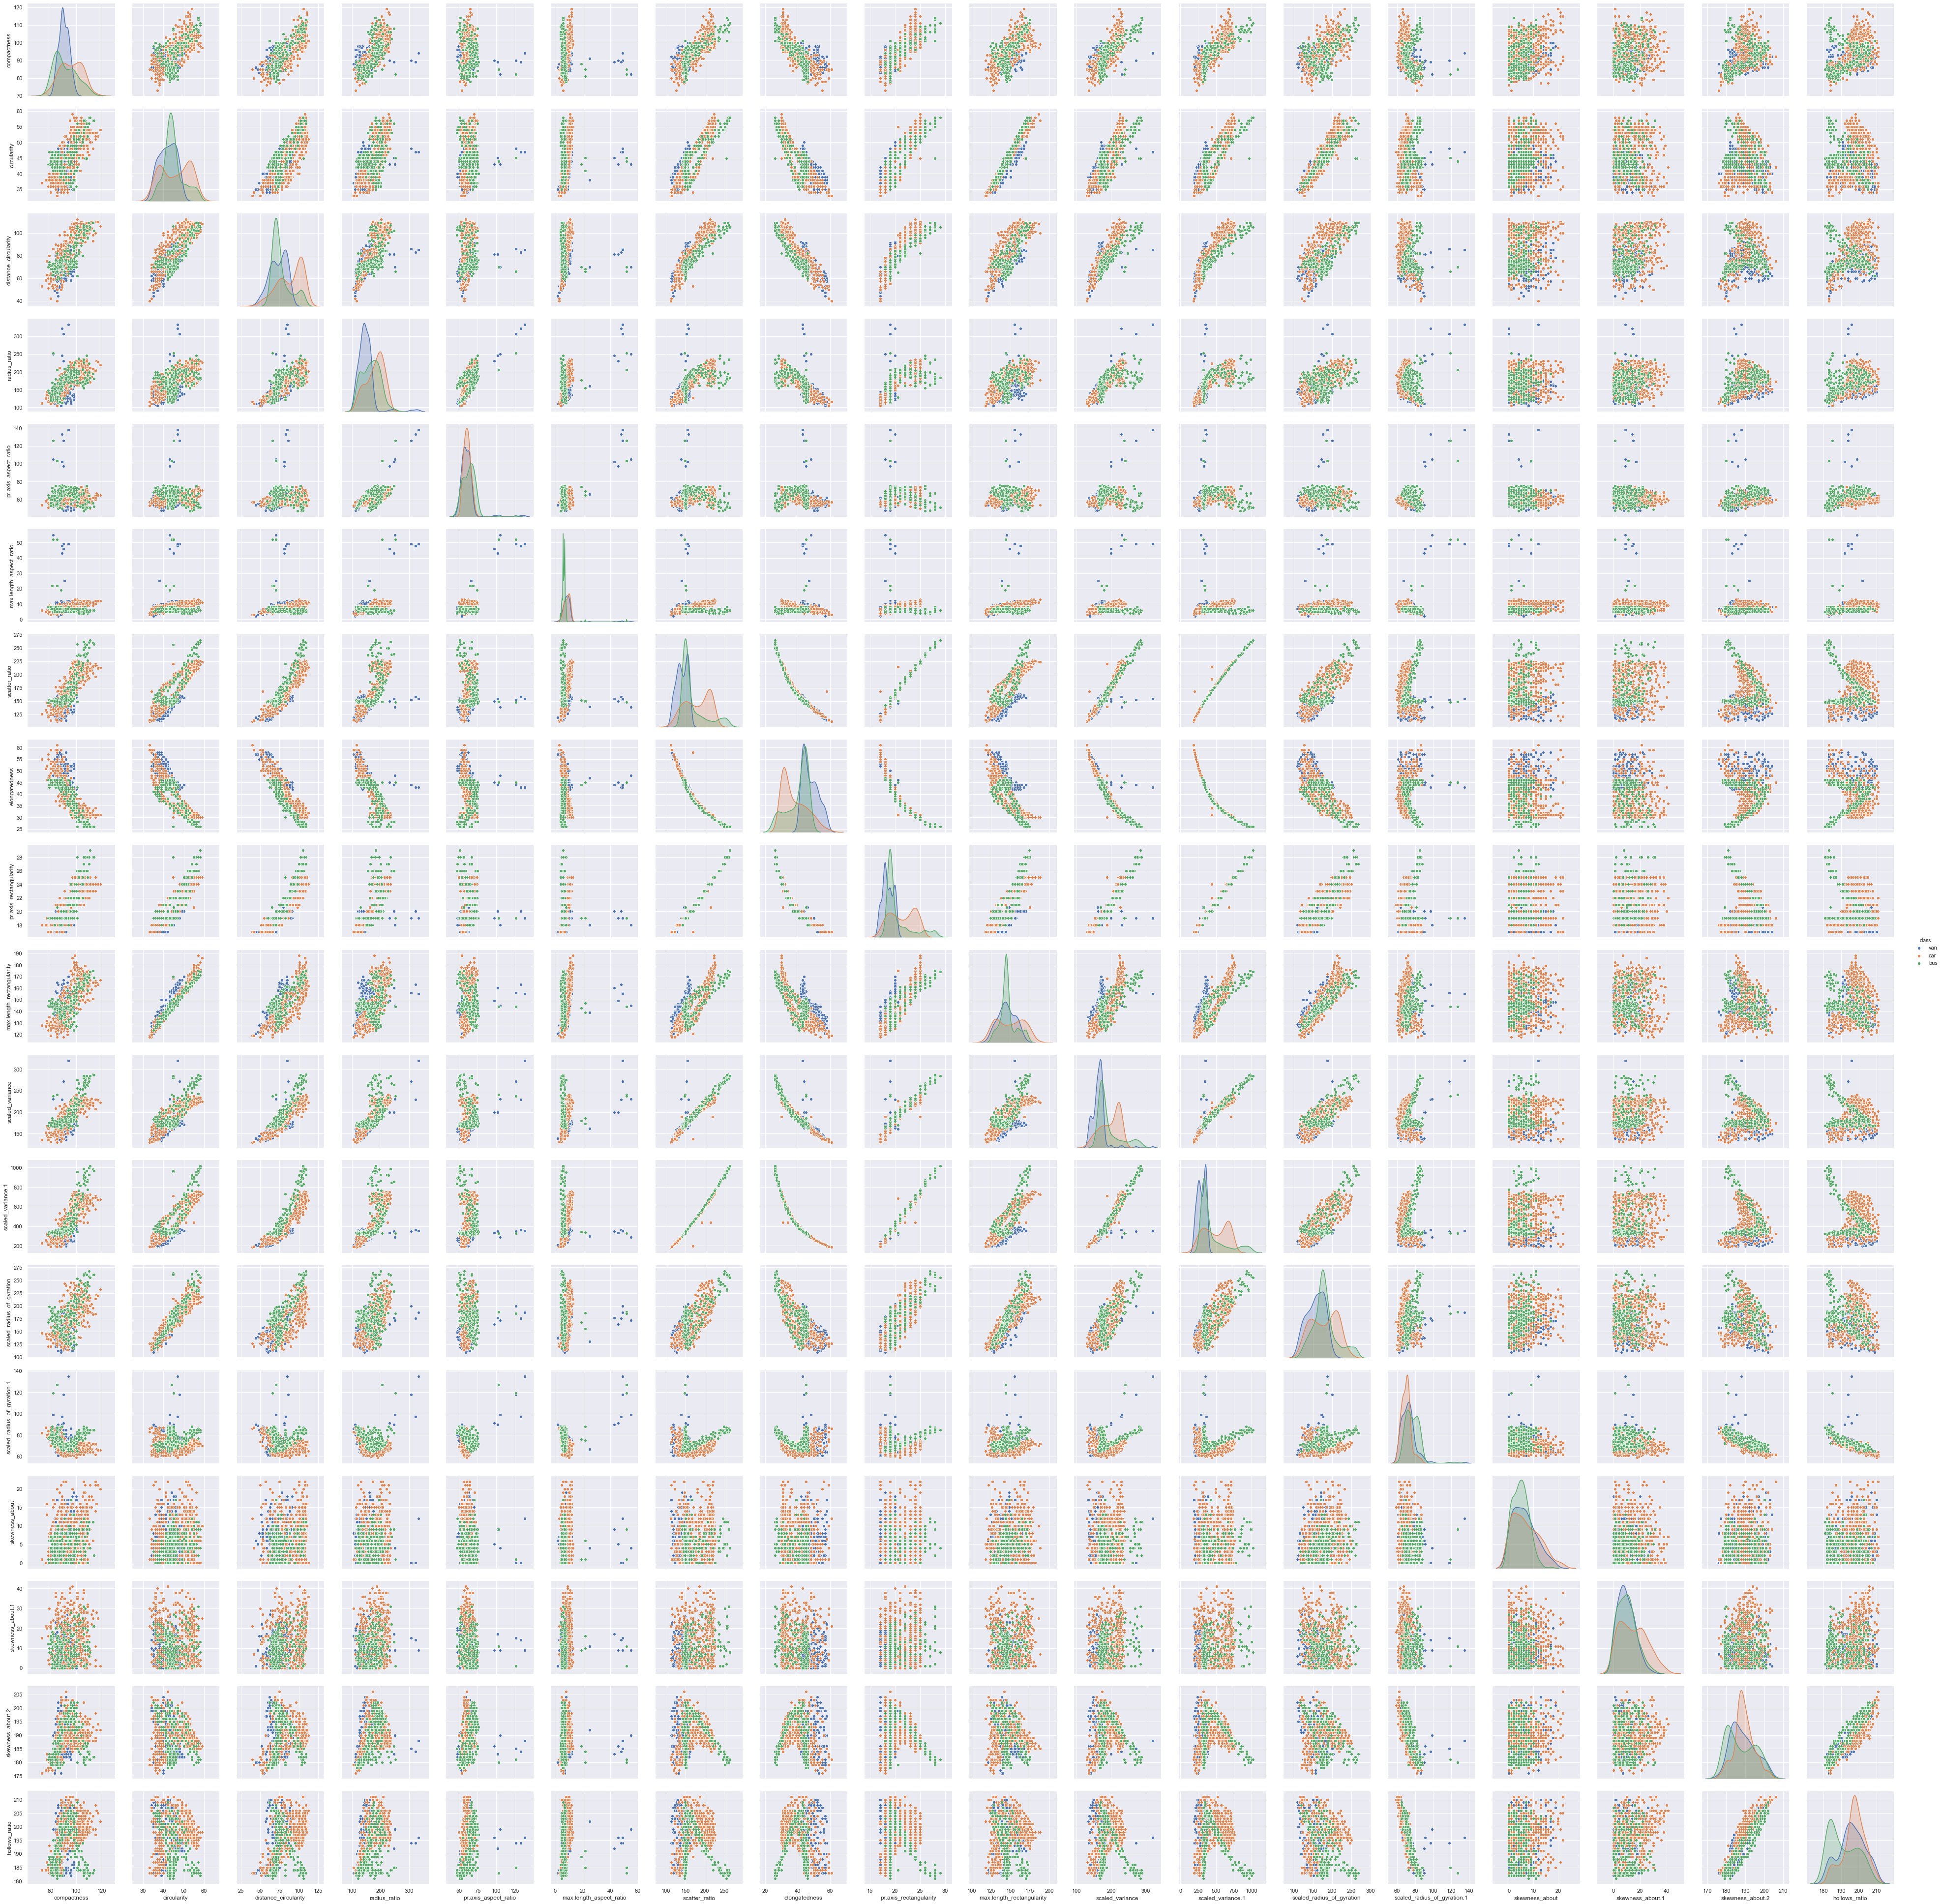

In [16]:
sns.pairplot(df, hue = 'class', diag_kind='kde',height=3)    
plt.show()

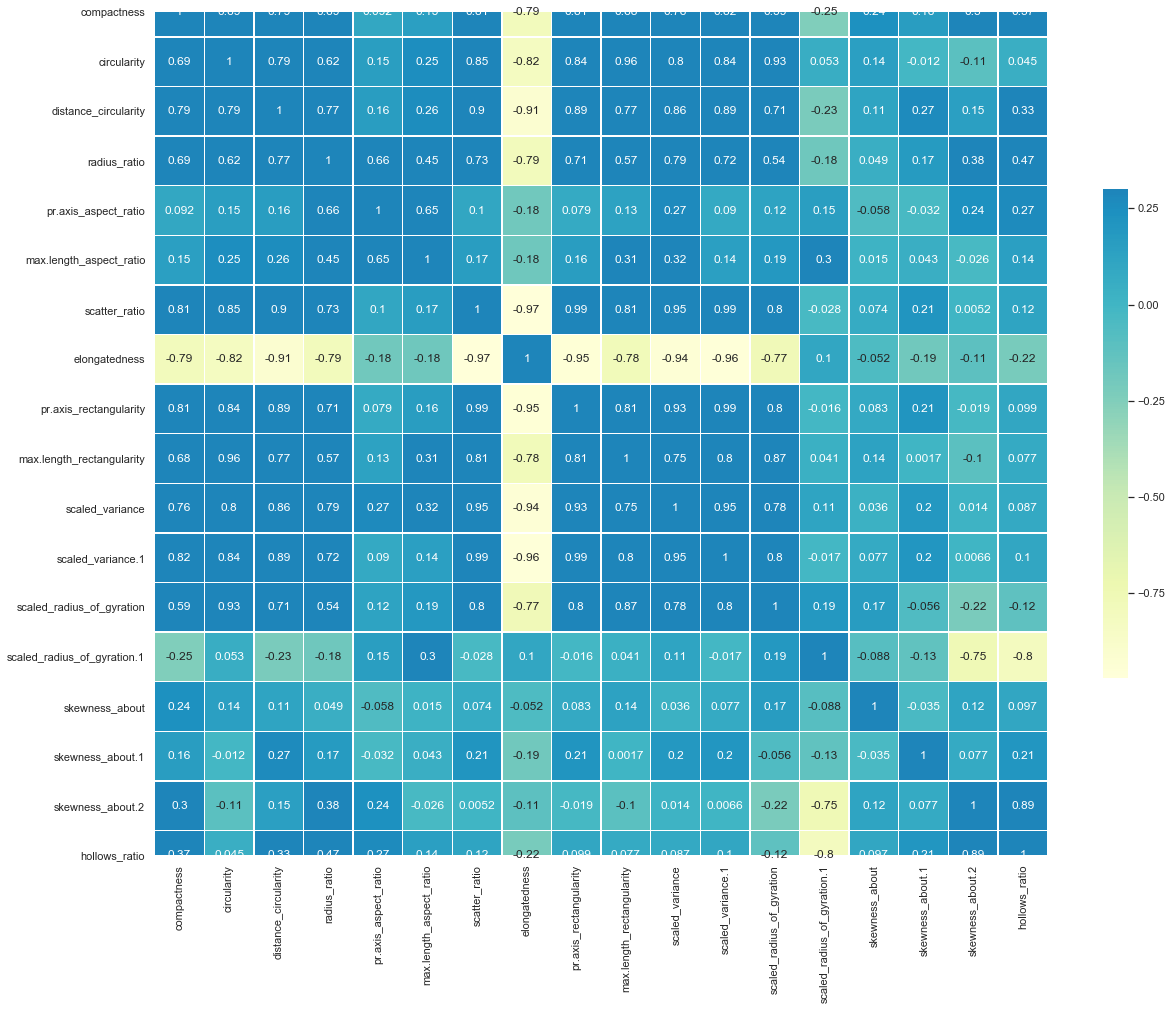

In [17]:
sns.set(style="white")
# Compute the correlation matrix
corr = df.corr()



# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True,cmap='YlGnBu',  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

> Observation:-
  1. Elongatedness has high correlation with scatter_ratio(95%) and Scaled_variance.1(93%)
  2. We can drop scatter_ratio(95%) and Scaled_variance.1 varialble as these have higher corelation with Elongatedness.
  3. Class variable has 3 categorigal variable , so we have to convert that in one hot encoding before feeding to our model.

In [18]:
adf=df.drop(['scatter_ratio','scaled_variance.1'],axis=1)
adf.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95    48.000000                  83.0    178.000000   
1           91    41.000000                  84.0    141.000000   
2          104    50.000000                 106.0    209.000000   
3           93    41.000000                  82.0    159.000000   
4           85    44.000000                  70.0    205.000000   
5          107    44.828775                 106.0    172.000000   
6           97    43.000000                  73.0    173.000000   
7           90    43.000000                  66.0    157.000000   
8           86    34.000000                  62.0    140.000000   
9           93    44.000000                  98.0    168.888095   

   pr.axis_aspect_ratio  max.length_aspect_ratio  elongatedness  \
0                  72.0                       10           42.0   
1                  57.0                        9           45.0   
2                  66.0                       10           32.0   
3                  63.0                        9           46.0   
4                 103.0                       52           45.0   
5                  50.0                        6           26.0   
6                  65.0                        6           42.0   
7                  65.0                        9           48.0   
8                  61.0                        7           54.0   
9                  62.0                       11           36.0   

   pr.axis_rectangularity  max.length_rectangularity  scaled_variance  \
0                    20.0                        159            176.0   
1                    19.0                        143            170.0   
2                    23.0                        158            223.0   
3                    19.0                        143            160.0   
4                    19.0                        144            241.0   
5                    28.0                        169            280.0   
6                    19.0                        143            176.0   
7                    18.0                        146            162.0   
8                    17.0                        127            141.0   
9                    22.0                        146            202.0   

   scaled_radius_of_gyration  scaled_radius_of_gyration.1  skewness_about  \
0                      184.0                         70.0             6.0   
1                      158.0                         72.0             9.0   
2                      220.0                         73.0            14.0   
3                      127.0                         63.0             6.0   
4                      188.0                        127.0             9.0   
5                      264.0                         85.0             5.0   
6                      172.0                         66.0            13.0   
7                      164.0                         67.0             3.0   
8                      112.0                         64.0             2.0   
9                      152.0                         64.0             4.0   

   skewness_about.1  skewness_about.2  hollows_ratio class  
0              16.0             187.0            197   van  
1              14.0             189.0            199   van  
2               9.0             188.0            196   car  
3              10.0             199.0            207   van  
4              11.0             180.0            183   bus  
5               9.0             181.0            183   bus  
6               1.0             200.0            204   bus  
7               3.0             193.0            202   van  
8              14.0             200.0            208   van  
9              14.0             195.0            204   car

In [19]:
# Converting class variables to Label encoding
from sklearn.preprocessing import LabelEncoder

adf['class_label_encoded'] = LabelEncoder().fit_transform(adf['class'])

In [20]:
adf.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95    48.000000                  83.0    178.000000   
1           91    41.000000                  84.0    141.000000   
2          104    50.000000                 106.0    209.000000   
3           93    41.000000                  82.0    159.000000   
4           85    44.000000                  70.0    205.000000   
5          107    44.828775                 106.0    172.000000   
6           97    43.000000                  73.0    173.000000   
7           90    43.000000                  66.0    157.000000   
8           86    34.000000                  62.0    140.000000   
9           93    44.000000                  98.0    168.888095   

   pr.axis_aspect_ratio  max.length_aspect_ratio  elongatedness  \
0                  72.0                       10           42.0   
1                  57.0                        9           45.0   
2                  66.0                       10           32.0   
3                  63.0                        9           46.0   
4                 103.0                       52           45.0   
5                  50.0                        6           26.0   
6                  65.0                        6           42.0   
7                  65.0                        9           48.0   
8                  61.0                        7           54.0   
9                  62.0                       11           36.0   

   pr.axis_rectangularity  max.length_rectangularity  scaled_variance  \
0                    20.0                        159            176.0   
1                    19.0                        143            170.0   
2                    23.0                        158            223.0   
3                    19.0                        143            160.0   
4                    19.0                        144            241.0   
5                    28.0                        169            280.0   
6                    19.0                        143            176.0   
7                    18.0                        146            162.0   
8                    17.0                        127            141.0   
9                    22.0                        146            202.0   

   scaled_radius_of_gyration  scaled_radius_of_gyration.1  skewness_about  \
0                      184.0                         70.0             6.0   
1                      158.0                         72.0             9.0   
2                      220.0                         73.0            14.0   
3                      127.0                         63.0             6.0   
4                      188.0                        127.0             9.0   
5                      264.0                         85.0             5.0   
6                      172.0                         66.0            13.0   
7                      164.0                         67.0             3.0   
8                      112.0                         64.0             2.0   
9                      152.0                         64.0             4.0   

   skewness_about.1  skewness_about.2  hollows_ratio class  \
0              16.0             187.0            197   van   
1              14.0             189.0            199   van   
2               9.0             188.0            196   car   
3              10.0             199.0            207   van   
4              11.0             180.0            183   bus   
5               9.0             181.0            183   bus   
6               1.0             200.0            204   bus   
7               3.0             193.0            202   van   
8              14.0             200.0            208   van   
9              14.0             195.0            204   car   

   class_label_encoded  
0                    2  
1                    2  
2                    1  
3                    2  
4                    0  
5                    0  
6                

> New label encoded values of 'class' variable are
  bus = 0
  car = 1
  van = 2
  

In [21]:
#drop class variable 
adf=adf.drop(['class'],axis=1)
adf

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  elongatedness  \
0                    72.0                       10           42.0   
1                    57.0                        9           45.0   
2                    66.0                       10           32.0   
3                    63.0                        9           46.0   
4                   103.0                       52           45.0   
..                    ...                      ...            ...   
841                  64.0                        8           40.0   
842                  66.0                       11           43.0   
843                  67.0                       12           30.0   
844                  58.0                        7           50.0   
845                  55.0                        5           56.0   

     pr.axis_rectangularity  max.length_rectangularity  scaled_variance  \
0                      20.0                        159            176.0   
1                      19.0                        143            170.0   
2                      23.0                        158            223.0   
3                      19.0                        143            160.0   
4                      19.0                        144            241.0   
..                      ...                        ...              ...   
841                    20.0                        134            200.0   
842                    20.0                        159            173.0   
843                    25.0                        173            228.0   
844                    18.0                        124            155.0   
845                    17.0                        128            140.0   

     scaled_radius_of_gyration  scaled_radius_of_gyration.1  skewness_about  \
0                        184.0                         70.0             6.0   
1                        158.0                         72.0             9.0   
2                        220.0                         73.0            14.0   
3                        127.0                         63.0             6.0   
4                        188.0                        127.0             9.0   
..                         ...                          ...             ...   
841                      149.0                         72.0             7.0   
842                      176.0                         72.0             1.0   
843                      200.0                         70.0             3.0   
844                      148.0                         66.0             0.0   
845                      131.0                         73.0             1.0   

     skewness_about.1  skewness_about.2  hollows_ratio  class_label_encoded  
0                16.0             187.0            197                    2  
1                14.0             189.0            199                    2  
2                 9.0             188.0            196                    1  
3                10.0             199.0            207                    2  
4                11.0             180.0            183                    0  
..                ...        

### Spliting the data into test and train

In [22]:
from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

target = adf['class_label_encoded']
features = adf.drop(['class_label_encoded'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.2, random_state = 10)

### Scaling the data

In [53]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30,random_state=20)
sc=StandardScaler()
X_train_sd= sc.fit_transform(X_train)
X_test_sd = sc.transform(X_test)

### Train a Support vector machine

In [42]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data with kernel = 'Linear'
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train_sd, y_train)

prediction = svc_model.predict(X_test_sd)


In [43]:
# check the accuracy on the training set
print(svc_model.score(X_train_sd, y_train))
print(svc_model.score(X_test_sd, y_test))

0.9341216216216216
0.9133858267716536


In [96]:
# Building a Support Vector Machine on train data with kernel = 'rbf'
%timeit pass
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train_sd, y_train)

# check the accuracy on the training set
print("Train accuracy-  ",svc_model.score(X_train_sd, y_train))
print("Test accuracy-   ",svc_model.score(X_test_sd, y_test))

6.19 ns ± 0.0521 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
Train accuracy-   0.9763313609467456
Test accuracy-    0.9647058823529412


In [46]:
#Building a Support Vector Machine on train data(changing the kernel)
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train_sd, y_train)

prediction = svc_model.predict(X_test_sd)

print(svc_model.score(X_train_sd, y_train))
print(svc_model.score(X_test_sd, y_test))

0.8277027027027027
0.7952755905511811


In [47]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train_sd, y_train)

prediction = svc_model.predict(X_test_sd)

print(svc_model.score(X_train_sd, y_train))
print(svc_model.score(X_test_sd, y_test))

0.652027027027027
0.6614173228346457


> Observation:-
SVM gives train accuracy score of 0.97 and test accuracy score of 0.95 (when kernel='rbf').

### Apply Principal component analysis on given data set

In [48]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00169205  0.69321119  0.79890124  0.69243059  0.09249239  0.13955742
  -0.79690271  0.82152003  0.68318293  0.76897355  0.59213989 -0.23117379
   0.22381684  0.15461367  0.30280123  0.36621899]
 [ 0.69321119  1.00169205  0.79317679  0.6201834   0.15597529  0.24311191
  -0.82368325  0.84674873  0.96535831  0.79616518  0.92855143  0.06239254
   0.14998312 -0.01362319 -0.10338834  0.04212554]
 [ 0.79890124  0.79317679  1.00169205  0.75413443  0.13652345  0.25135105
  -0.91737668  0.89854202  0.77531276  0.86393847  0.71178192 -0.20344237
   0.12645075  0.26862085  0.14067952  0.32447352]
 [ 0.69243059  0.6201834   0.75413443  1.00169205  0.66768624  0.47516204
  -0.7781773   0.69870191  0.5744136   0.79470635  0.5281735  -0.10895193
   0.05488438  0.16943603  0.36831224  0.45016774]
 [ 0.09249239  0.15597529  0.13652345  0.66768624  1.00169205  0.7004596
  -0.16430138  0.06935861  0.1379506   0.28382625  0.11623307  0.25463095
  -0.05096827 -0.0364788   0.201827

In [49]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 47.22409972  65.61347648  77.94146251  85.26943941  90.85491452
  93.9168412   95.96056094  97.30788334  98.29179115  98.79138449
  99.13449612  99.40767346  99.61354089  99.78030042  99.90285358
 100.        ]


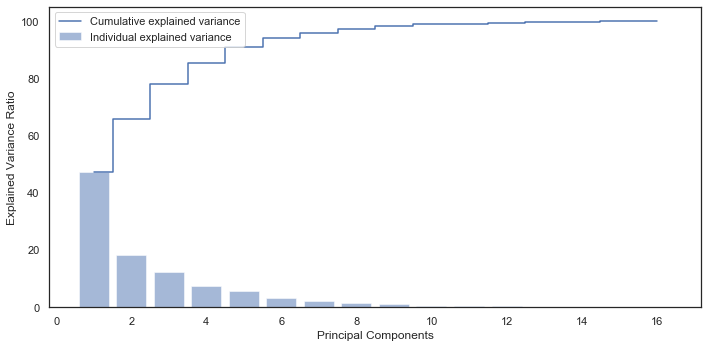

In [50]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [51]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:17]

[(7.568640820733027,
  array([ 0.30808246,  0.32875546,  0.33888181,  0.30384939,  0.10532852,
          0.12298271, -0.34535252,  0.34245047,  0.31923755,  0.34120859,
          0.30352395, -0.01512813,  0.05280255,  0.06008793,  0.0415869 ,
          0.09088716])),
 (2.9472787931136826,
  array([ 0.13146702, -0.13308236,  0.06714308,  0.14709973,  0.03579149,
         -0.07609235, -0.01073887, -0.05853842, -0.12359908, -0.08040282,
         -0.21888264, -0.50452079,  0.08082894,  0.13063888,  0.54003489,
          0.53741616])),
 (1.9758152917864904,
  array([-0.11766689, -0.09240851, -0.08456744,  0.28586502,  0.64285781,
          0.57267302,  0.0893701 , -0.14661406, -0.07935358,  0.0319334 ,
         -0.11334167,  0.26338557, -0.11108047, -0.03078993,  0.07892246,
          0.09481977])),
 (1.174460189704671,
  array([ 0.03850978,  0.15334546, -0.10669704, -0.04086946,  0.07032338,
          0.04249053,  0.10923642, -0.1221287 ,  0.15546397, -0.13204051,
          0.16408246, -0.

In [ ]:
# # generating dimensionally reduced datasets
# w = np.hstack((eigen_pairs[0][3].reshape(16,4), 
#                       eigen_pairs[1][3].reshape(16,4),
#                      eigen_pairs[2][3].reshape(16,4),
#                       eigen_pairs[3][3].reshape(16,4)))
                     
# print('Matrix W:\n', w)
# X_sd_pca = X_train_sd.dot(w)
# X_test_sd_pca = X_test_sd.dot(w)

We can get 95% accuracy using 7 eigen vectors.

### Spliting the data into train and test

In [75]:
from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

# Splitting the data into train and test with same random state value.

target = adf['class_label_encoded']
features = adf.drop(['class_label_encoded'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.2, random_state = 10)

### Scaling the data

In [76]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

### Tranform train and test data into eigen vectors

In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_sd)
X_test_pca = pca.transform(X_test_sd)

### Train SVM with new data after PCA

In [78]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data with kernel = 'Linear'
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train_pca, y_train)

prediction = svc_model.predict(X_test_pca)


In [79]:
# check the accuracy on the training set
print(svc_model.score(X_train_pca, y_train))
print(svc_model.score(X_test_pca, y_test))

0.8224852071005917
0.6882352941176471


In [97]:
# Building a Support Vector Machine on train data with kernel = 'rbf'
%timeit pass
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train_pca, y_train)

# check the accuracy on the training set
print("Train accuracy -  ",svc_model.score(X_train_pca, y_train))
print("Test accuracy-    ",svc_model.score(X_test_pca, y_test))

6.11 ns ± 0.0695 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
Train accuracy -   0.9511834319526628
Test accuracy-     0.9058823529411765


In [82]:
#Building a Support Vector Machine on train data(changing the kernel)
svc_model = SVC(kernel='poly')
svc_model.fit(X_train_pca, y_train)


print(svc_model.score(X_train_pca, y_train))
print(svc_model.score(X_test_pca, y_test))

0.8949704142011834
0.7941176470588235


In [83]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train_pca, y_train)

prediction = svc_model.predict(X_test_pca)

print(svc_model.score(X_train_pca, y_train))
print(svc_model.score(X_test_pca, y_test))

0.5133136094674556
0.5764705882352941


> Observation :- When we reduce dimension from 16 to 7 using PCA, we get train accuracy = 0.96 and test accuracy = 0.89 (with kernel = 'rbf'). 

#### Comparing the accuracy  before PCA and after PCA

In [100]:
scores = {' ': ['Before PCA','After PCA'],
          ' Train accuracy ' : [0.97,0.96],
          ' Test accuracy': [0.95,0.89],
          ' Execution time': ['6.19 ns','6.11 ns']
          
        
        }

df = pd.DataFrame(scores)

print (df)

                Train accuracy    Test accuracy  Execution time
0  Before PCA              0.97            0.95         6.19 ns
1   After PCA              0.96            0.89         6.11 ns


#### After reducing dimention of the data from 16 variable to 7 variable we get  0.89 test accuracy with SVM . Which is 0.07 less than the test accuracy before PCA. So compromising 0.07 accuracy from droping 9 column is acceptable in terms of execution time when dealing with large data. After PCA the execution time droped from 6.19 to 6.11 ns. After PCA we save 0.07 ns of execution time.

In [101]:
!jupyter nbconvert --to html Unsupervised_learning_vehicle.ipynb

[NbConvertApp] Converting notebook Unsupervised_learning_vehicle.ipynb to html
[NbConvertApp] Writing 6652704 bytes to Unsupervised_learning_vehicle.html
